# Temperature Forecast Project

### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures).

WORK:

1) IMPORTING LIBRARIES

2) LOADING DATASET & DESCRIPTION

3) EXPLORATORY DATA ANALYSIS

4) DATA PREPROCESSING OF DATA

5) SPLITING DATA AND APPLYING train_test_split

6) FINDING BEST RANDOM STATE

7) FINDING BEST ALGORITHM

8) IMPORTING CROSS_VALIDATION_SCORE

9) REGULARIZATION

10) SAVING OUR MODEL

11) RESULTS & CONCLUSION

#### TARGET VARIABLE:
In this context, we use Regression models to predict the "Next_Tmax", "Next_Tmin" 


"Next_Tmax", "Next_Tmin" is our target varaibles.

In [1]:
## importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset

df = pd.read_csv("Temperature Forecast.csv")

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
# displaying all columns

pd.set_option("display.max_columns",None)

In [6]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [7]:
# looking last 10 rows

df.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,0.045451,0.034340,0.000000e+00,0.014070,0.000000,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,0.056634,0.076289,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,0.038019,0.005380,0.000000e+00,0.000938,0.000000,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.000000,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.000000,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,9.837888e-01,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [8]:
df.shape

(7752, 25)

In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [10]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All attributes are given in Numeric format, except "Date".

### Attribute Information:


1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8



# DESCRIBING DATA

The measures of central tendency and distribution are some measures to define the data set.

The measures used to define the central tendency are mean, median and mode.

The standard deviations (or variance) are the minimum and maximum values of variables. The table below is a summary of some statistical measures for each numeric predictor of the dataset:

mean: It indicates the average value around which each group of attributes is attested.

std (Standard Deviation): It indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

In [11]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#### OBSERVATIONS:

our target varaibles:

Next_Tmax has highest value = 38.900000 and minimum value= 17.400000

Next_Tmin has highest value = 29.800000 and minimum value = 11.300000


In [12]:
# let's get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# EXPLORATORY DATA ANALYSIS


#### Univariate Analysis of Continous variables:

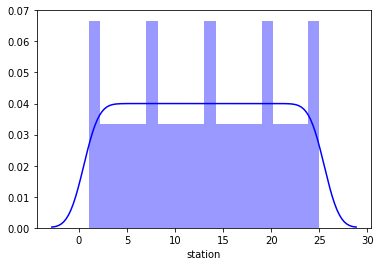

In [13]:
sns.distplot(df["station"], kde=True,color = 'blue')

"station" is normally distributed

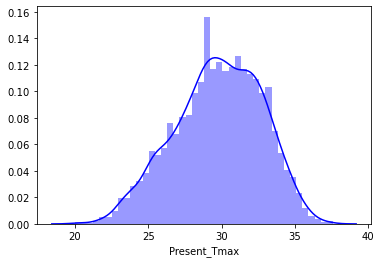

In [14]:
sns.distplot(df["Present_Tmax"], kde=True,color = 'blue')

"Present_Tmax" is normally distributed

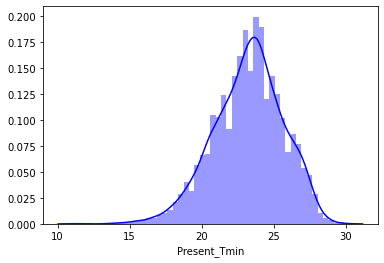

In [15]:
sns.distplot(df["Present_Tmin"], kde=True,color = 'blue')

"Present_Tmin" is little left skewed.

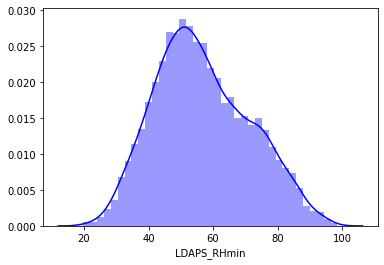

In [16]:
sns.distplot(df["LDAPS_RHmin"], kde=True,color = 'blue')

"LDAPS_RHmin" is normally distributed

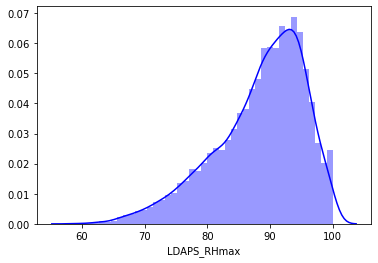

In [17]:
sns.distplot(df["LDAPS_RHmax"], kde=True,color = 'blue')

"LDAPS_RHmax" is little left skewed.

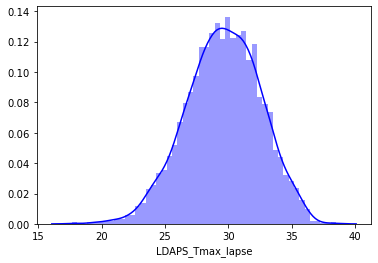

In [18]:
sns.distplot(df["LDAPS_Tmax_lapse"], kde=True,color = 'blue')

"LDAPS_Tmax_lapse" is normally distributed

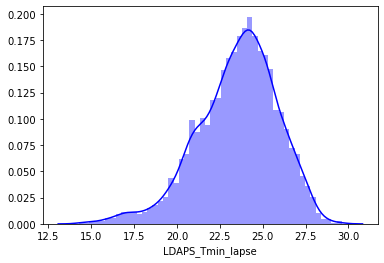

In [19]:
sns.distplot(df["LDAPS_Tmin_lapse"], kde=True,color = 'blue')

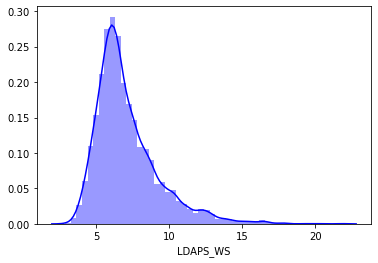

In [20]:
sns.distplot(df["LDAPS_WS"], kde=True,color = 'blue')

"LDAPS_WS" is right skewed.

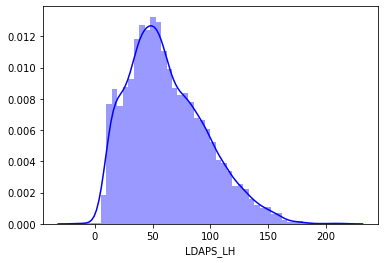

In [21]:
sns.distplot(df["LDAPS_LH"], kde=True,color = 'blue')

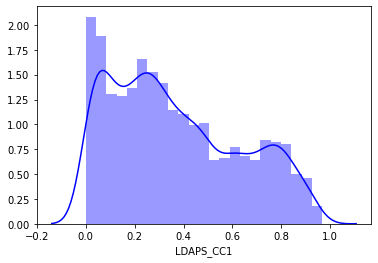

In [22]:
sns.distplot(df["LDAPS_CC1"], kde=True,color = 'blue')

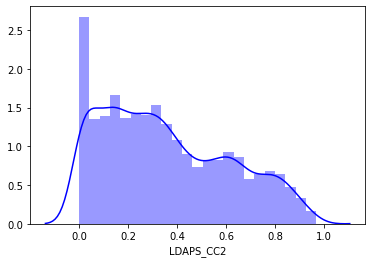

In [23]:
sns.distplot(df["LDAPS_CC2"], kde=True,color = 'blue')

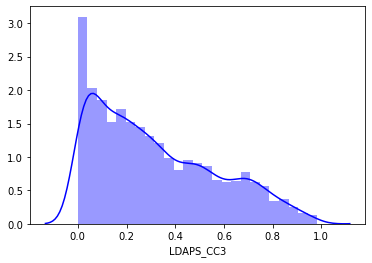

In [24]:
sns.distplot(df["LDAPS_CC3"], kde=True,color = 'blue')

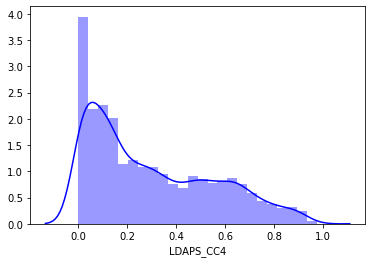

In [25]:
sns.distplot(df["LDAPS_CC4"], kde=True,color = 'blue')

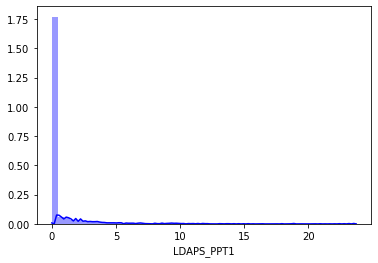

In [26]:
sns.distplot(df["LDAPS_PPT1"], kde=True,color = 'blue')

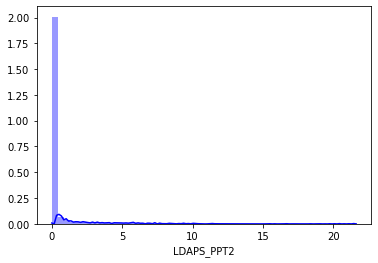

In [27]:
sns.distplot(df["LDAPS_PPT2"], kde=True,color = 'blue')

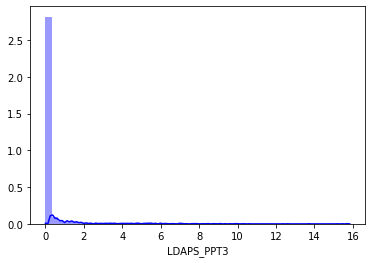

In [28]:
sns.distplot(df["LDAPS_PPT3"], kde=True,color = 'blue')

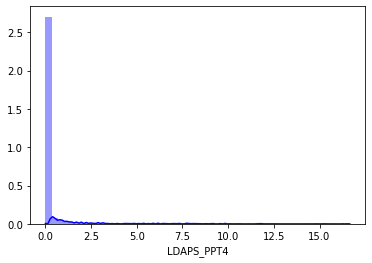

In [29]:
sns.distplot(df["LDAPS_PPT4"], kde=True,color = 'blue')

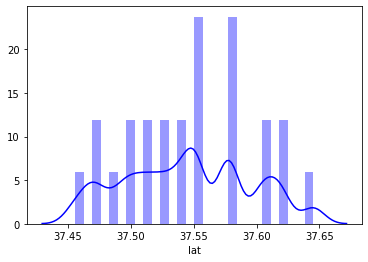

In [30]:
sns.distplot(df["lat"], kde=True,color = 'blue')

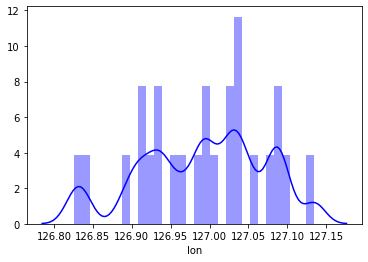

In [31]:
sns.distplot(df["lon"], kde=True,color = 'blue')

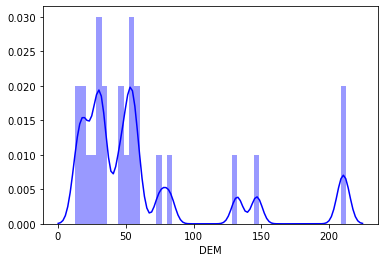

In [32]:
sns.distplot(df["DEM"], kde=True,color = 'blue')

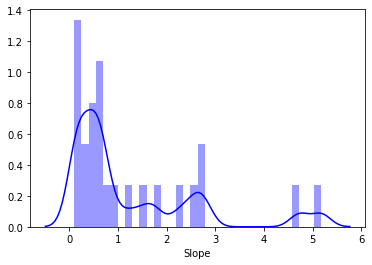

In [33]:
sns.distplot(df["Slope"], kde=True,color = 'blue')

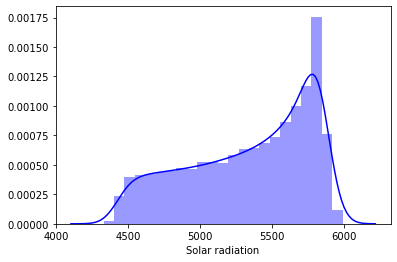

In [34]:
sns.distplot(df["Solar radiation"], kde=True,color = 'blue')

### Analysis of our Target Variable:

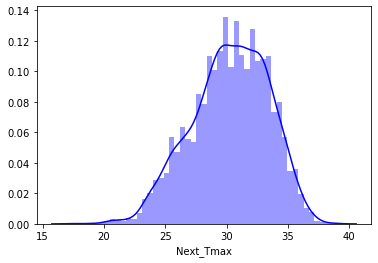

In [35]:
sns.distplot(df["Next_Tmax"], kde=True,color = 'blue')

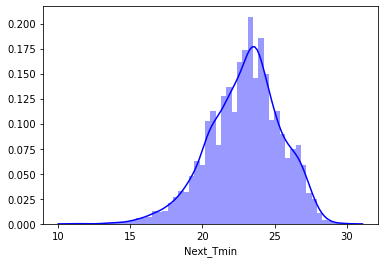

In [36]:
sns.distplot(df["Next_Tmin"], kde=True,color = 'blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEBC2D5BB0>,
      dtype=object)

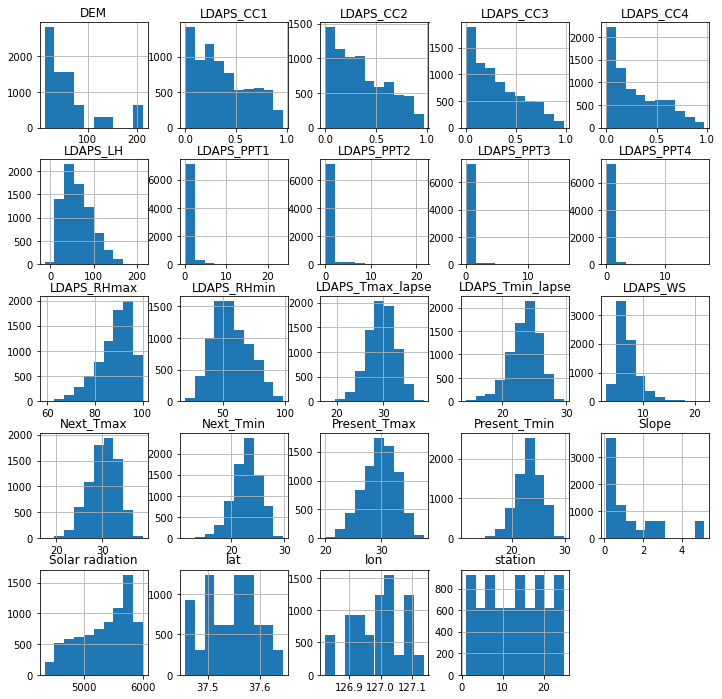

In [37]:
# we use histogram for showing our continous variables.

df.hist(figsize=(12,12),sharex=False)

# FINDING CORRELATION

In [38]:
corr= df.corr()
corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,0.003414,0.000698,0.006159,-0.002748,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,-0.215816,-0.145513,-0.142497,-0.110001,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,0.091439,-0.002839,-0.045091,0.114312,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


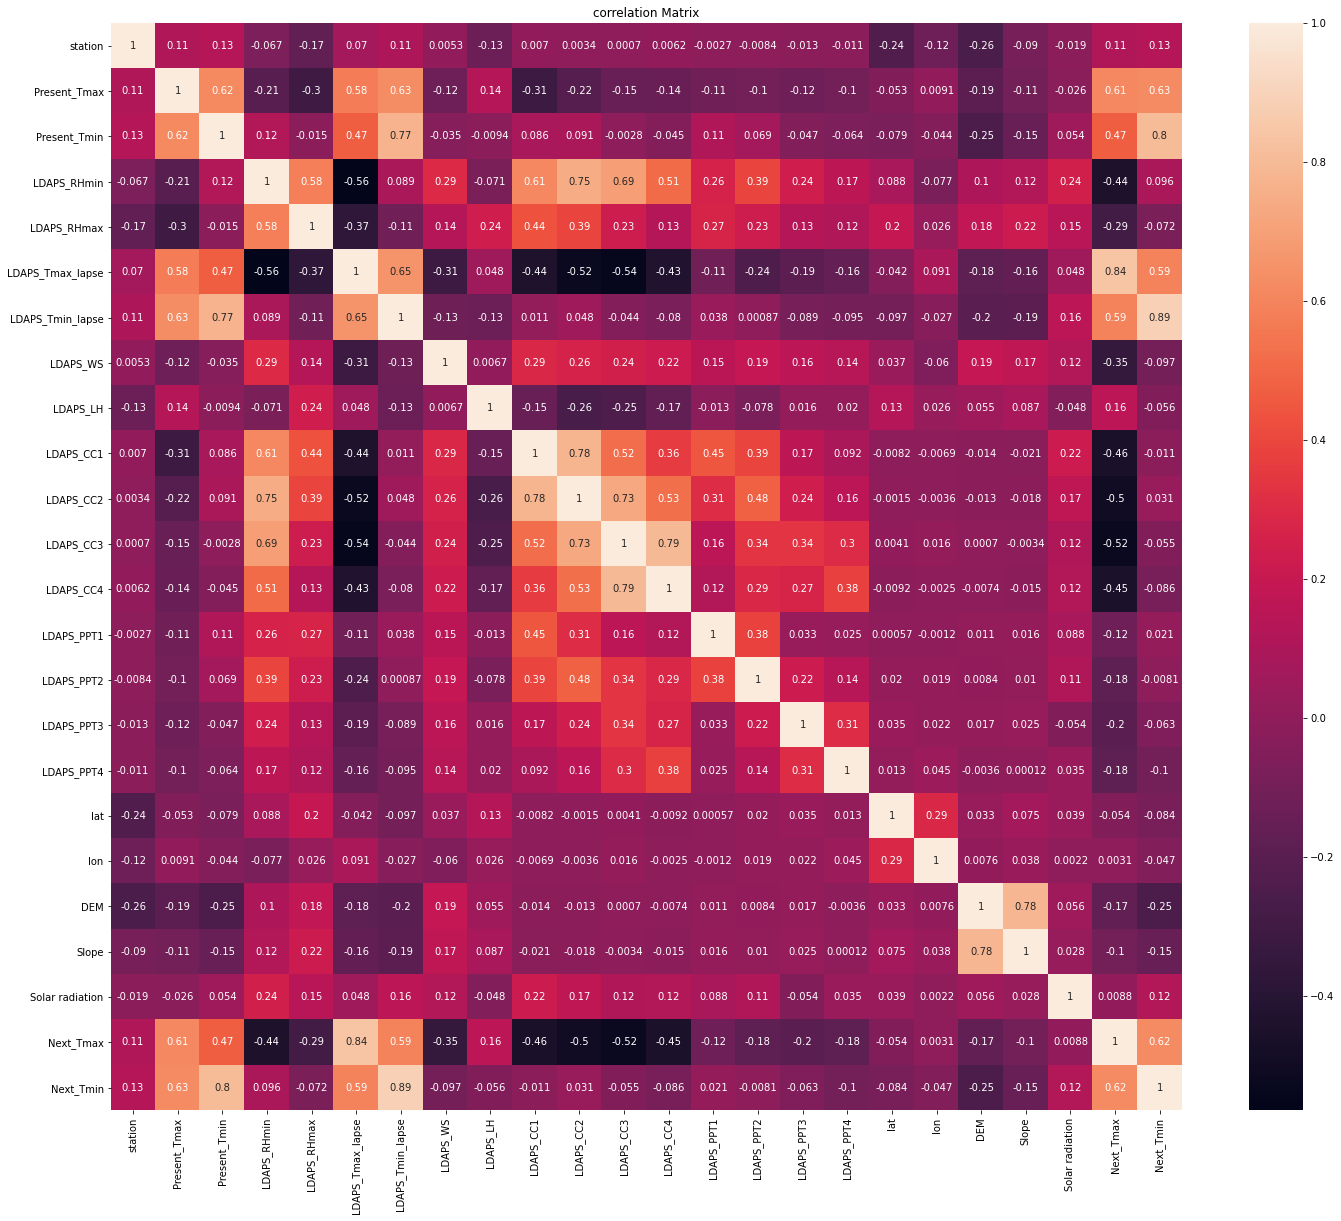

In [39]:
corr_mat=df.corr()   

plt.figure(figsize=[24,20])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [40]:
corr_matrix=df.corr()
corr_matrix["Next_Tmax"].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.836144
Next_Tmin           0.621427
Present_Tmax        0.613109
LDAPS_Tmin_lapse    0.593195
Present_Tmin        0.473868
LDAPS_LH            0.159324
station             0.108306
Solar radiation     0.008809
lon                 0.003060
lat                -0.053567
Slope              -0.102838
LDAPS_PPT1         -0.120079
DEM                -0.172674
LDAPS_PPT2         -0.180449
LDAPS_PPT4         -0.180669
LDAPS_PPT3         -0.196845
LDAPS_RHmax        -0.286478
LDAPS_WS           -0.346592
LDAPS_RHmin        -0.442958
LDAPS_CC4          -0.451324
LDAPS_CC1          -0.457583
LDAPS_CC2          -0.496251
LDAPS_CC3          -0.520706
Name: Next_Tmax, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

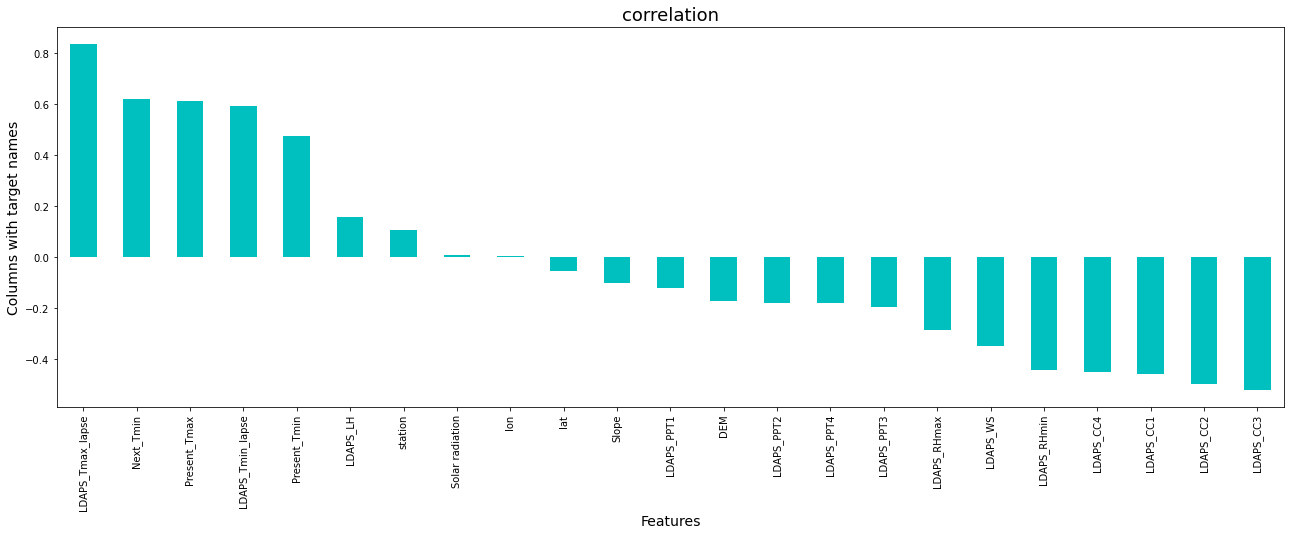

In [41]:
plt.figure(figsize=(22,7))
df.corr()["Next_Tmax"].sort_values(ascending=False).drop(["Next_Tmax"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

In [42]:
corr_matrix=df.corr()
corr_matrix["Next_Tmin"].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886964
Present_Tmin        0.799758
Present_Tmax        0.625252
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.591535
station             0.128719
Solar radiation     0.120400
LDAPS_RHmin         0.095830
LDAPS_CC2           0.031500
LDAPS_PPT1          0.021486
LDAPS_PPT2         -0.008131
LDAPS_CC1          -0.011129
lon                -0.046737
LDAPS_CC3          -0.055217
LDAPS_LH           -0.055895
LDAPS_PPT3         -0.063318
LDAPS_RHmax        -0.072490
lat                -0.083621
LDAPS_CC4          -0.085805
LDAPS_WS           -0.097390
LDAPS_PPT4         -0.104515
Slope              -0.147043
DEM                -0.247100
Name: Next_Tmin, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

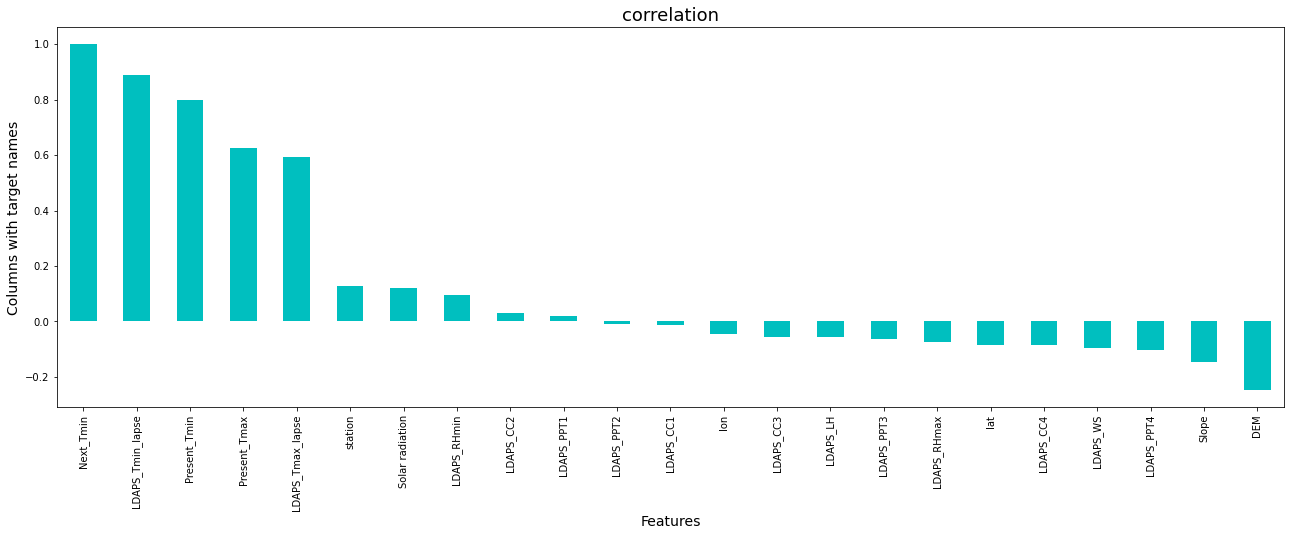

In [43]:
plt.figure(figsize=(22,7))
df.corr()["Next_Tmin"].sort_values(ascending=False).drop(["Next_Tmax"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

# DATA PREPROCESSING

### checking missing values

In [44]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [45]:
df.shape

(7752, 25)

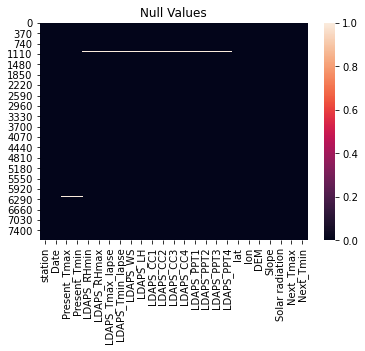

In [46]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [47]:
df['Date']=df['Date'].fillna(df['Date'].mode()[0])

In [48]:
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [49]:
# fill nan values with mean

In [50]:
for i in df.columns:
    if df[i].dtypes!= "object":
        df[i]=df[i].fillna(df[i].mean())

In [51]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

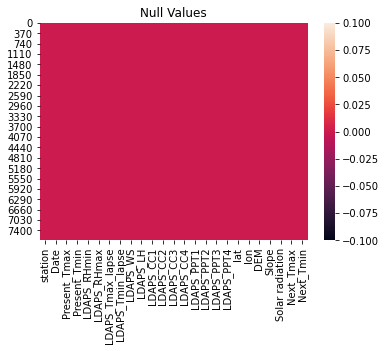

In [52]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [53]:
# Handling date column

In [54]:
df["Day"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.day

In [55]:
df["Month"] = pd.to_datetime(df.Date, format = "%d-%m-%Y").dt.month

In [56]:
df["Year"] = pd.to_datetime(df.Date, format = "%d-%m-%Y").dt.year

In [57]:
df.head(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013


In [58]:
#  we have converted Date column into integers, Now we can drop this column, as it is of no use.

df.drop(["Date"], axis = 1, inplace = True)

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

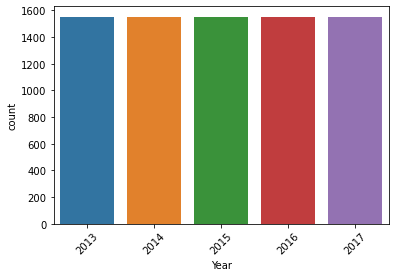

In [59]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Year",data=df)
plt.xticks(rotation=45)

df['Year'].unique()

we can see that, the data given is of 5 years

# Checking outliers

In [60]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Day                   int64
Month                 int64
Year                  int64
dtype: object

In [61]:
df.columns.size

27

<function matplotlib.pyplot.show(*args, **kw)>

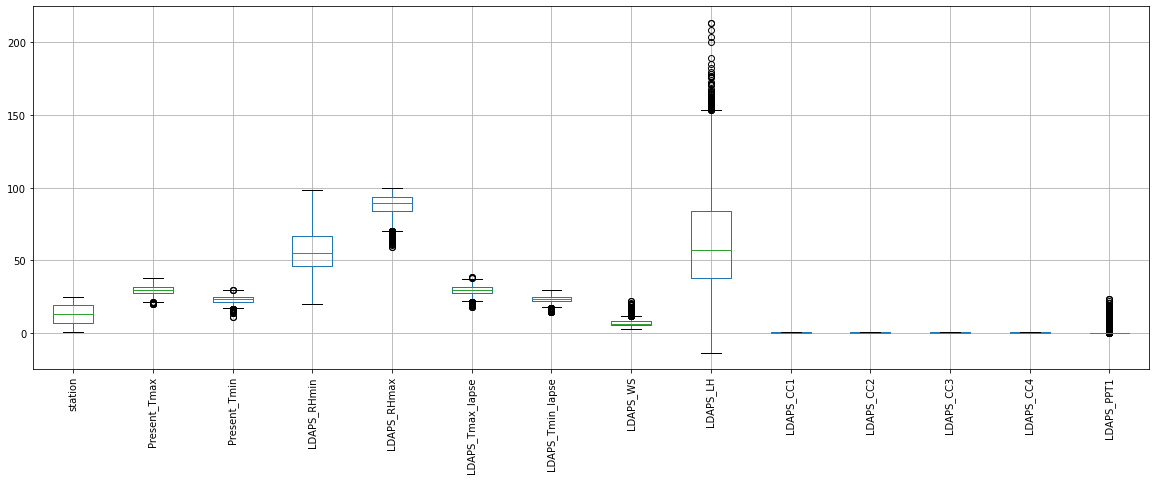

In [62]:
df.iloc[:,0:14].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

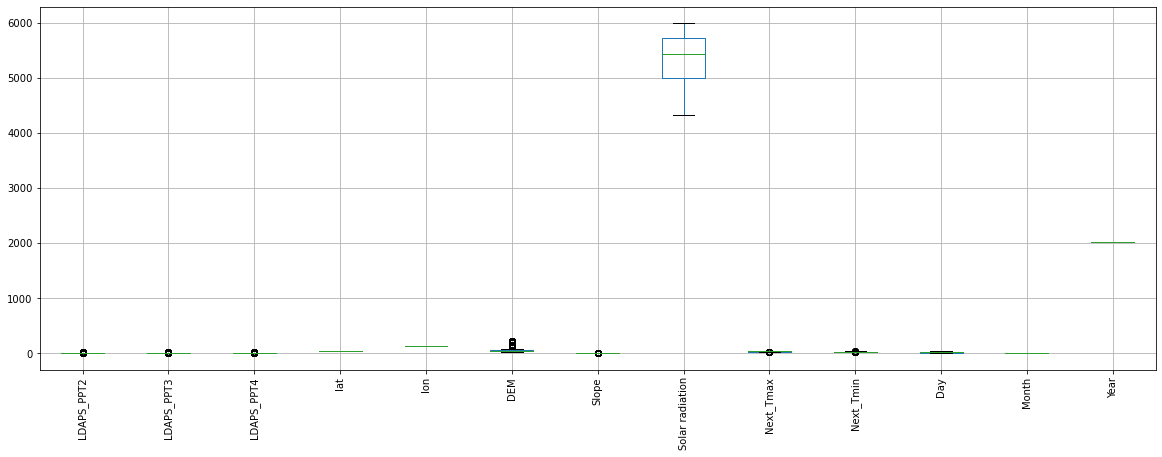

In [63]:
df.iloc[:,14:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show

OBSERVATION:

Outliers are present in age, umbrella_limit, policy_annual_premium, total_claim_amount, property_claim.

we will treat these outliers, to make more accurate predictions.

we will remove them by Zscore.

Z-score (standard score) gives us an idea of how far from the mean a data point is.More technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

The z score formula for a sample is:

z = (x – μ) / σ

In [64]:
# importing Z-Score

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [65]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [66]:
df_new_z.shape

(6894, 27)

In [67]:
df.shape

(7752, 27)

In [68]:
Data_loss=((7752-6894)/7752)*100

In [69]:
Data_loss

11.06811145510836

# Checking Skweness

In [70]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                -0.008839
Month              -0.195325
Year                0.000365
dtype: float64

In [71]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df)

df_new=pd.DataFrame(df_new,columns=df.columns)

In [72]:
df_new.skew()

station            -0.204565
Present_Tmax       -0.035006
Present_Tmin       -0.012048
LDAPS_RHmin        -0.017469
LDAPS_RHmax        -0.115143
LDAPS_Tmax_lapse   -0.009351
LDAPS_Tmin_lapse   -0.017827
LDAPS_WS            0.002408
LDAPS_LH            0.057403
LDAPS_CC1           0.046757
LDAPS_CC2           0.045326
LDAPS_CC3           0.087933
LDAPS_CC4           0.126895
LDAPS_PPT1          1.404189
LDAPS_PPT2          1.577808
LDAPS_PPT3          1.747820
LDAPS_PPT4          1.963848
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmax          -0.038540
Next_Tmin          -0.013745
Day                -0.216675
Month              -0.092081
Year               -0.000108
dtype: float64

# Splitting the data into X(INDEPENDENT VAR) & Y(DEPENDENT VAR)

In [75]:
x= df_new.drop(columns = ["Next_Tmax","Next_Tmin"], axis=1)

In [76]:
y = df_new.filter(["Next_Tmax","Next_Tmin"], axis=1)

In [77]:
y

,Next_Tmax,Next_Tmin
0,-0.436861,-0.745293
1,0.010451,-0.240855
2,0.209956,0.342379
3,0.414174,0.516713
4,0.243665,-0.240855
...,...,...
7747,-0.681113,-1.806797
7748,-0.590481,-1.584277
7749,-0.829608,-2.019450
7750,-3.218330,-3.468917


In [78]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,-1.860356,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,-0.412176,-0.506509,-0.541852,-0.584801,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,1.463048,-2.420090,-1.413892
1,-1.648385,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,-0.451258,-0.283702,-0.554289,-0.603593,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,1.463048,-2.420090,-1.413892
2,-1.454848,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,-0.527382,-0.258127,-0.317480,-0.520112,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,1.463048,-2.420090,-1.413892
3,-1.273958,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,-0.494077,-0.401828,-0.544825,-0.565449,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,1.463048,-2.420090,-1.413892
4,-1.102545,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,-0.814752,-0.291713,-0.448666,-0.365736,-0.570471,-0.532418,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,1.463048,-2.420090,-1.413892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.312469,-2.023162,-2.270927,-2.395892,-1.326845,-1.111724,-1.831134,-0.307886,0.383363,-1.502656,-1.152361,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-1.257759,-1.578128,-1.280447,-1.754608,1.463048,1.014314,1.414171
7748,1.427440,-2.023162,-2.087438,-2.681557,-1.470235,-0.902733,-1.843546,-0.063701,-0.363041,-1.466503,-1.187449,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-1.041466,-1.400633,-1.072947,-1.760631,1.463048,1.014314,1.414171
7749,1.541188,-2.049920,-2.180066,-2.803707,-1.474702,-0.600985,-1.904782,0.337939,-1.973052,-1.386744,-1.276108,-1.595889,-1.474280,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.291792,-1.193124,-0.935044,-1.744763,1.463048,1.014314,1.414171
7750,0.077088,-2.846187,-3.688005,-3.168120,-2.459357,-3.504186,-2.891504,-4.119648,-7.414001,-1.694130,-1.649551,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-2.020630,-1.985144,-1.477264,-1.887071,-1.890104,-0.903061,-1.413892


# SCALING

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [80]:
x.head(5)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,0.000000,0.418259,0.417608,0.590490,0.593541,0.428408,0.415905,0.588946,0.710832,0.360040,0.320143,0.296263,0.265438,0.0,0.0,0.0,0.0,0.0,0.512099,1.000000,0.867054,1.000000,0.97344,0.0,0.0
1,0.062316,0.609434,0.428817,0.517236,0.574624,0.515672,0.489565,0.488442,0.662788,0.349063,0.382547,0.292767,0.259870,0.0,0.0,0.0,0.0,0.0,0.646975,0.534308,0.339168,0.879907,0.97344,0.0,0.0
2,0.119213,0.590655,0.528867,0.471335,0.366235,0.527803,0.529913,0.531874,0.555724,0.327684,0.389710,0.359328,0.284606,0.0,0.0,0.0,0.0,0.0,0.734149,0.424219,0.164035,0.874540,0.97344,0.0,0.0
3,0.172392,0.615733,0.535020,0.590302,0.820303,0.508345,0.438151,0.484085,0.701059,0.337038,0.349463,0.295428,0.271172,0.0,0.0,0.0,0.0,0.0,0.613788,0.541874,0.842549,0.868420,0.97344,0.0,0.0
4,0.222784,0.578234,0.445851,0.565536,0.558361,0.478990,0.449533,0.492878,0.801947,0.246975,0.380303,0.322455,0.330348,0.0,0.0,0.0,0.0,0.0,1.000000,0.443625,0.334076,0.870820,0.97344,0.0,0.0


# FINDING BEST RANDOM STATE

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.807447066808278 on Random_state 43


# CREATING TRAIN TEST SPLIT

In [94]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [97]:
LR= LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [98]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=43)
for i in (LR,knn, dt, rf):
    i.fit(x_train, y_train)
    
    pred = i.predict(x_test)
    
    print("r2_score",i,"=", r2_score(y_test,pred))

r2_score LinearRegression() = 0.807447066808278
r2_score KNeighborsRegressor() = 0.8555658293237456
r2_score DecisionTreeRegressor() = 0.7772113338551292
r2_score RandomForestRegressor() = 0.9013180451517517


# CROSS_VALIDATION_SCORE

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=43)
for i in (LR,knn, dt, rf):
    scr=cross_val_score(i,x,y,cv=5)
    print("cross validation score",i,"=", scr.mean())

cross validation score LinearRegression() = 0.707930828087475
cross validation score KNeighborsRegressor() = 0.29686035402616207
cross validation score DecisionTreeRegressor() = 0.43747615331108747
cross validation score RandomForestRegressor() = 0.6941488591324606


# REGULARIZATION

In [103]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=43)
enr.fit(x_train,y_train)
enrpred= enr.predict(x_test)
enr.score(x_train,y_train)

print("ElasticNetScore:",enr.score(x_train,y_train))

ElasticNetScore: 0.7892560167733259


In [104]:
LR=LinearRegression()

In [105]:
LR.fit(x_train,y_train)

LinearRegression()

# SAVE THE MODEL

In [106]:
import pickle
filename= "Temperature_LR.pkl"
pickle.dump(LR,open(filename,"wb"))

# LOAD THE MODEL

In [107]:
loaded_model=pickle.load(open("Temperature_LR.pkl","rb"))

result= loaded_model.score(x_test,y_test)

print(result)

0.807447066808278
